# LlamaGPT


#### LlamaGPT te brinda una experiencia de lectura única en dos niveles.  
#### En el modo básico, conversa con el lenguaje;  
#### y en el modo avanzado, ¡dialoga directamente con el contenido de tu PDF!  
#### ¡Disfruta de la versatilidad y sumérgete en una lectura interactiva a tu medida!


Primero nos desplazamos a la carpeta donde se encuentran las clases

In [1]:
cd ./source

/home/ldiez/LlamaGPT1.0/source


Ejecutamos todos los archivos, la pseudointerfaz que sirve para pedir datos inciales, el modelo de lenguaje de la que heredan LoadModel, Normal_Conver y PDF_Conver, y después Metrics y Memory que esta asociado a PDF_Conver.   

In [2]:
%run GUI.py
%run Model.py
%run LoadModel.py
%run Normal_Conver.py 
%run PDF_Conver.py
%run Metrics.py
%run Memory.py

/home/ldiez/MiTFG/.python/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Volvemos a la carpeta donde se encuentra este Jupiter Notebook

In [3]:
cd ../

/home/ldiez/LlamaGPT1.0


Pedimos datos inciales y guardamos config.txt en la carpeta files y cargamos el modelo, se grafica consumo de memoria durante este proceso.

Introduce el nombre del dispositivo(gpu/cpu):  gpu
Introduce la longitud:  1000
Introduce la temperatura:  0.8


Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


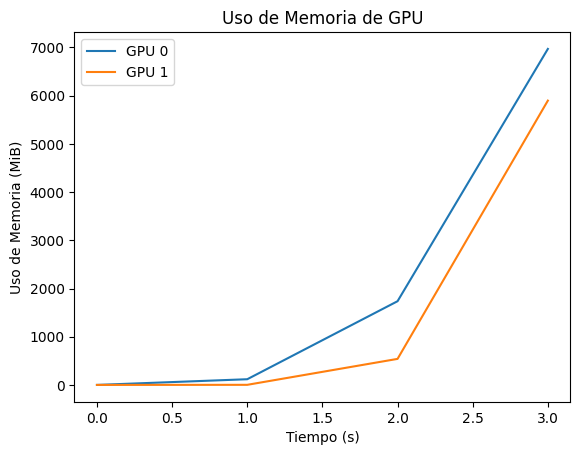

In [4]:
gui = GUI()
load = LoadModel()
tokenizer , pipeline = load.load()

A continuación se permite preguntar cualquier pregunta que quieras a su LLM recien creada. De igual manera que en la carga, despues de cada respuesta se graficará los recursos consuminidos.

Haz una pregunta (escribe 'exit' para salir):  Dime que opinas de los fondos indexados sft500 y si merece la mena invertir en ellos siendo joven.


Comment: Dime que opinas de los fondos indexados S&P 500 y si merece la pena invertir en ellos siendo joven.

I think the S&P 500 is a great index to invest in, regardless of age. The S&P 500 is a diversified index of the 500 largest publicly traded companies in the US, and it has provided strong long-term returns due to the growth of these companies.

Investing in the S&P 500 can provide several benefits, including:

1. Diversification: By investing in a broad basket of companies, you can reduce your risk and increase the potential for long-term returns.
2. Growth: Many of the companies in the S&P 500 have a strong track record of growth, which can lead to higher returns over time.
3. Liquidity: The S&P 500 is a highly liquid index, making it easy to buy and sell shares.
4. Low Cost: Index funds that track the S&P 500 tend to have lower fees than actively managed funds, which can help your money grow faster.

However, it's important to note that investing in the S&P 500 is not without

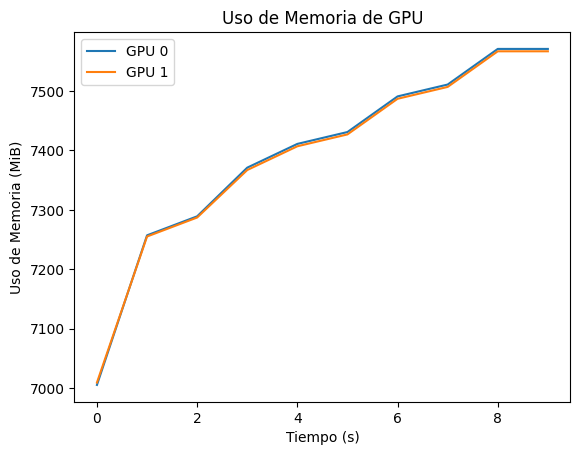

Haz una pregunta (escribe 'exit' para salir):  exit


¡Hasta luego!


In [5]:
conver = NormalConversation(tokenizer, pipeline)
# Bucle principal
while True:
    # Pregunta del usuario
    user_question = input("Haz una pregunta (escribe 'exit' para salir): ")

    # Salir si se escribe 'exit'
    if user_question.lower() == 'exit':
        print("¡Hasta luego!")
        break
    conver.main(user_question)

Para finalizar, se permite conversar con tres pdfs diferentes, según su tamaño. Como ya es costumbre, se grafica la memoria consumida en cada pregunta.

Escriba el tamaño del pdf con el que quiere conversar (pequeño/medio/grande):  grande


Contexto: 
La canción del noctámbulo El signo  Prólogo de Zaratustra  11   Cuando Zaratustra tenía treinta años2 abandonó su patria y el lago de su patria y marchó a las montañas. Allí gozó de su espíritu y de su soledad y durante diez años no se cansó de hacerlo. Pero al fin su corazón se transformó, - y una mañana, levantándose con la aurora, se colocó delante del sol y le habló así: «¡Tú gran astro! ¡Qué sería de tu felicidad si no tuvieras a aquellos a quienes ilumi-nas!3. Durante diez años has venido subiendo hasta mi caverna: sin mí, mi águila y mi ser-piente4 te habrías hartado de tu luz y de este camino. Pero nosotros te aguardábamos cada mañana, te liberábamos de tu sobreabundancia y te bendecíamos por ello. ¡Mira! Estoy hastiado de mi sabiduría como la abeja que ha reco-gido demasiada miel, tengo necesidad de manos que se extiendan. Me gustaría regalar y repartir hasta que los sabios entre los hombres hayan vuelto a re-gocijarse con su locura, y los pobres, con su riqueza. Pa

Haz una pregunta (escribe 'exit' para salir):  Resumelo porfavor.


El superhombre es el sentido de la tierra. ¡La tierra es el sentido del superhombre! El hombre es algo que debe ser superado, y el superhombre es el sentido de la tierra. ¡No creéis a los que os hablan de esperanzas sobreterrenales! ¡La tierra está cansada de ellos! Y en el momento en que hablaba estas palabras, Zaratustra se quitó la mascarilla y mostró su rostro al pueblo. Entonces, por primera vez, los ojos de los presentes se encontraron con los de Zaratustra; y como si hubiera habido un cambio de luz, el pueblo experimentó una gran emoción.  
Porque en ese rostro de Zaratustra había algo que no se había visto en ningún otro hombre: una profunda sabiduría y una gran belleza. ¡El superhombre! ¡El sentido de la tierra! ¡La tierra es el sentido del superhombre! Y así, Zaratustra, el gran profeta, se fue.  13 La ciudad es el lugar donde se celebra la exposición del volatinero. 14 El título de esta sección es una referencia a la famosa frase de Nietzsche: «Soy el superhombre». 15 La ide

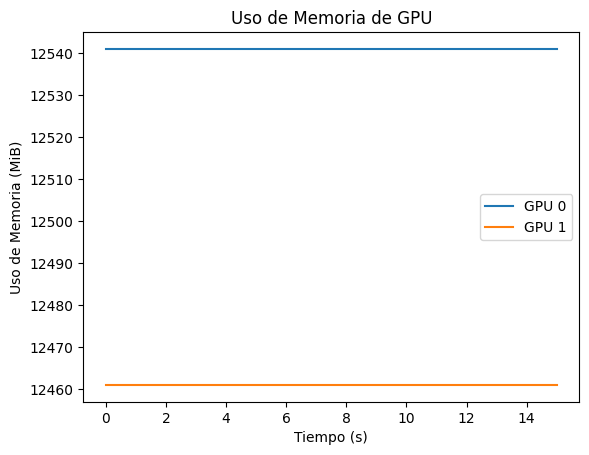

Haz una pregunta (escribe 'exit' para salir):  exit


¡Hasta luego!


In [6]:
pdf_conver = PDFConversation(tokenizer, pipeline)
print('Contexto: ')
print(pdf_conver.memory.get_context())

while True:
    # Pregunta del usuario
    user_question = input("Haz una pregunta (escribe 'exit' para salir): ")

    # Salir si se escribe 'exit'
    if user_question.lower() == 'exit':
        print("¡Hasta luego!")
        break
    pdf_conver.main(user_question)


#### Siguientes pasos
#### Realizar aplicación usable por usuario final. =)